[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bertoldi-collab/jax-intro/blob/main/notebooks/first_steps.ipynb)


# First steps with Jax

In [1]:
import matplotlib.pyplot as plt

## Grad


Taking gradients of functions using automatic differentiation (AD)

In [2]:
from jax import grad
import jax.numpy as jnp


In [3]:
def tanh(x):  # Define a function
    y = jnp.exp(-2.0 * x)
    return (1.0 - y) / (1.0 + y)


grad_tanh = grad(tanh)  # Obtain its gradient function
grad_tanh(1.0)   # Evaluate it at x = 1.0
# prints 0.4199743

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Array(0.4199743, dtype=float32, weak_type=True)

## vmap

Vectorizing a function

In [ ]:
grad_tanh(jnp.array([0.1, 3., -5.]))  # This will give an error

In [5]:
from jax import vmap

grad_tanh_mapped = vmap(grad_tanh)
grad_tanh_mapped(jnp.array([0.1, 3., -5.]))


Array([9.9006617e-01, 9.8660374e-03, 1.8157868e-04], dtype=float32)

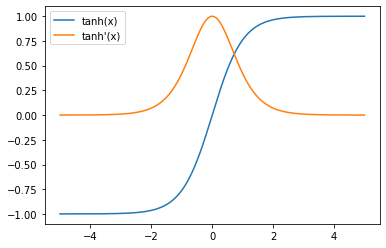

In [13]:
xs = jnp.linspace(-5, 5, 200)
ys = tanh(xs)
dys = grad_tanh_mapped(xs)
plt.plot(xs, ys, label="tanh(x)")
plt.plot(xs, dys, label="tanh'(x)")
plt.legend()

## Jacobian

Derivatives of vector functions i.e. $f:\mathbb R^m \to \mathbb R^n$

In [14]:
def vector_fn(x: jnp.ndarray):
    return x**2

In [ ]:
grad(vector_fn)(jnp.array([0., 1., 2.]))  # This will give an error

In [16]:
from jax import jacobian

jacobian(vector_fn)(jnp.array([0., 1., 2.]))

Array([[0., 0., 0.],
       [0., 2., 0.],
       [0., 0., 4.]], dtype=float32)

In [17]:
def vector_fn2(x: jnp.ndarray):
    return jnp.array([
        x**2,
        x**3,
    ])


jacobian(vector_fn2)(jnp.array([0., 1., 2.]))

Array([[[ 0.,  0.,  0.],
        [ 0.,  2.,  0.],
        [ 0.,  0.,  4.]],

       [[ 0.,  0.,  0.],
        [ 0.,  3.,  0.],
        [ 0.,  0., 12.]]], dtype=float32)

## jit

Compiling to XLA (using jit) is usually faster than regular numpy

In [18]:
from jax import jit

def slow_f(x):
  # Element-wise ops see a large benefit from fusion
  return x * x + x * 2.0

x = jnp.ones((10000, 10000))
fast_f = jit(slow_f)
%timeit slow_f(x)
%timeit fast_f(x)

226 ms ± 30.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
59.7 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
